# Credit Risk Prediction

### Importing Library

In [102]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import interp
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV       
from sklearn.metrics import roc_curve, r2_score, accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_curve, auc    

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
data = pd.read_csv('dataset/credit_data.csv')
temp = data.copy()

In [3]:
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
data.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
data.nunique()

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64

In [8]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

*************
### Insight from data

Average age is **35**<br>
Average credit amount is  **3271**

dataset have **4** numeric data and **5** categorical data 

Numeric feature = Age, Job, Credit amount, Duration<br>
Categorical feature = Sex, Housing, Saving Account, Checking amount, Purpose<br>
Target feature = Risk

******************

**********************
## Data Columns 
- Age = (numeric)
- Sex = (text: male, female)
- Job = (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
- Housing = (text: own, rent, or free)
- Saving accounts = (text - little, moderate, quite rich, rich)
- Checking account = (numeric, in DM - Deutsch Mark)
- Credit amount = (numeric, in DM)
- Duration = (numeric, in month)
- Purpose = (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
**********************

In [9]:
# Droping the Unnamed column
temp.drop(columns='Unnamed: 0',axis=1, inplace =True)

# Renaming columns
temp = temp.rename(
    columns=
    {
        'Credit amount' : 'Credit_Amount', 
        'Saving accounts':'Saving_Account', 
        'Checking account':'Checking_Account'
    }
)

## Data Preprocessing

### Checking Null value

In [10]:
temp.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_Account      183
Checking_Account    394
Credit_Amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Saving_Account

In [11]:
temp['Saving_Account'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [12]:
temp['Saving_Account'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving_Account, dtype: int64

In [13]:
temp[temp['Risk']=='good']['Saving_Account'].value_counts()

little        386
moderate       69
quite rich     52
rich           42
Name: Saving_Account, dtype: int64

In [14]:
temp[temp['Risk']=='bad']['Saving_Account'].value_counts()

little        217
moderate       34
quite rich     11
rich            6
Name: Saving_Account, dtype: int64

In [15]:
temp['Saving_Account'].isnull().sum()

183

- There is a possiblity that these people dont have saving account

In [16]:
# checking percentage of null value ie 18.3%

temp['Saving_Account'].isnull().sum()/len(data)*100

18.3

### Checking_Account

In [17]:
temp['Checking_Account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [18]:
temp['Checking_Account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking_Account, dtype: int64

In [19]:
# checking the percentage of null value in Checking Account

temp['Checking_Account'].isnull().sum()/len(data)*100

39.4

- 39.4% of the whole data is null

In [20]:
temp[temp['Risk']=='good']['Checking_Account'].value_counts()

moderate    164
little      139
rich         49
Name: Checking_Account, dtype: int64

In [21]:
temp[temp['Risk']=='bad']['Checking_Account'].value_counts()

little      135
moderate    105
rich         14
Name: Checking_Account, dtype: int64

- Changing missing value with new value 'no_account' because they meant to be not a checking account as other columns are not null.


### Encoding the data

In [22]:
# checking the unique value for categorical data

for col in temp.select_dtypes('object').columns:
    print(col," : ",temp[col].unique())
    print("unique value count",temp[col].nunique())
    print("\n")

Sex  :  ['male' 'female']
unique value count 2


Housing  :  ['own' 'free' 'rent']
unique value count 3


Saving_Account  :  [nan 'little' 'quite rich' 'rich' 'moderate']
unique value count 4


Checking_Account  :  ['little' 'moderate' nan 'rich']
unique value count 3


Purpose  :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
unique value count 8


Risk  :  ['good' 'bad']
unique value count 2




## EDA

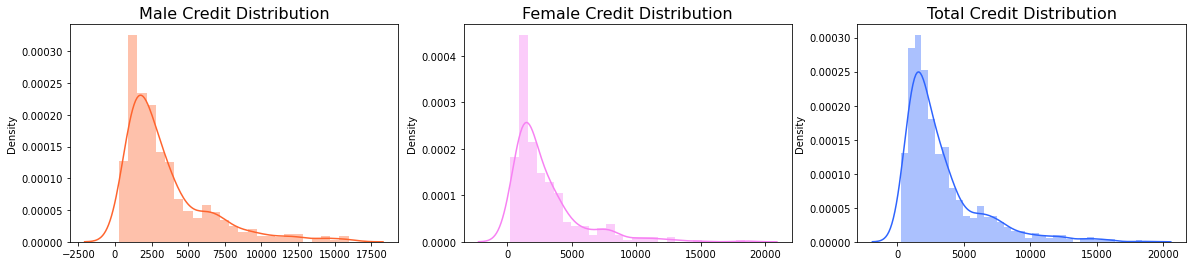

In [23]:
# Distribution of Credit_Amount for each Gender

male_credit = temp["Credit_Amount"].loc[temp["Sex"] == "male"].values
female_credit = temp["Credit_Amount"].loc[temp["Sex"] == "female"].values
total_credit = temp['Credit_Amount'].values

fig, ax = plt.subplots(1, 3, figsize=(20,4))

sns.distplot(male_credit, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Credit Distribution", fontsize=16)

sns.distplot(female_credit, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Credit Distribution", fontsize=16)

sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)

plt.show()

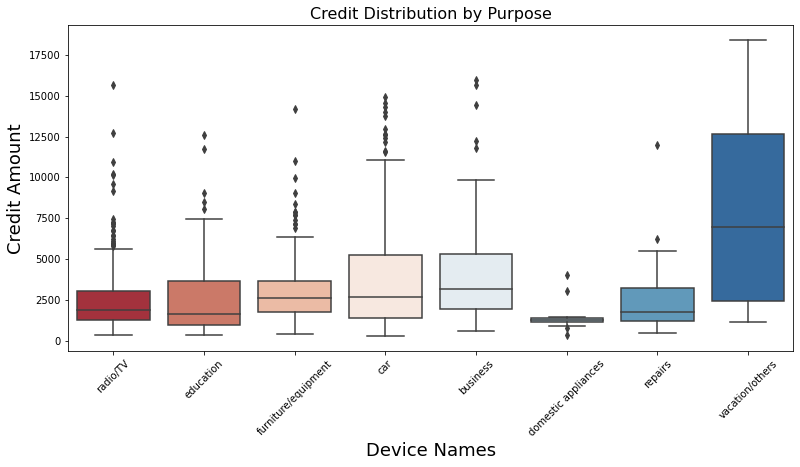

In [24]:
# Credit_Amount Distribution by Purpose

plt.figure(figsize=(13,6)) 
g = sns.boxplot(x='Purpose', y='Credit_Amount', data=temp, palette="RdBu")

g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) 

g.set_xlabel('Device Names', fontsize=18) 
g.set_ylabel('Credit Amount', fontsize=18) 

plt.show()

- vacation/other has highest Credit Amount after that business and car
- domestic appliances has lowest Credit Amount

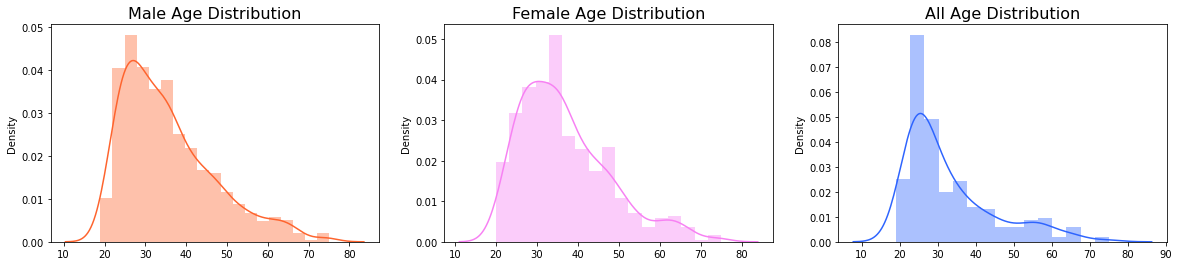

In [25]:
# Distribution of Gender

by_age = temp['Age'].values.tolist()
male_age = temp['Age'].loc[temp['Sex'] == 'male'].values.tolist()
female_age = temp['Age'].loc[temp['Sex'] == 'female'].values.tolist()

fig, ax = plt.subplots(1, 3, figsize=(20,4))

sns.distplot(by_age, ax=ax[0], color="#FE642E")
ax[0].set_title("Male Age Distribution", fontsize=16)

sns.distplot(male_age, ax=ax[1], color="#F781F3")
ax[1].set_title("Female Age Distribution", fontsize=16)

sns.distplot(female_age, ax=ax[2], color="#2E64FE")
ax[2].set_title("All Age Distribution", fontsize=16)

plt.show()

- Majority of Male fall under the age of 25 to 40 
- For Female it is 25 to 35 
- Mostly people fall under the age of 20 to 30

In [52]:
# Gender vs Purpose let's see the purpose of having credit loans for each gender.

temp["Purpose"].unique()
sex_purpose = pd.crosstab(temp['Purpose'], temp['Sex']).apply(lambda x: round(x/x.sum() * 100, 2)).reset_index()
sex_purpose

Sex,Purpose,female,male
0,business,6.13,11.30
1,car,30.32,35.22
2,domestic appliances,1.94,0.87
3,education,7.74,5.07
4,furniture/equipment,23.87,15.51
5,radio/TV,27.42,28.26
6,repairs,1.61,2.46
7,vacation/others,0.97,1.30


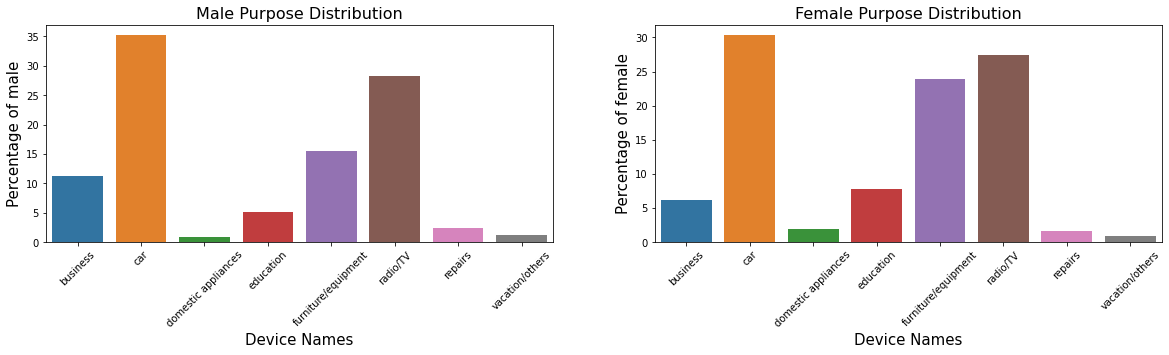

In [53]:

male_purpose = sex_purpose['male'].values.tolist()
female_purpose = sex_purpose['female'].values.tolist()

fig, ax = plt.subplots(1, 2, figsize=(20,4))

g = sns.barplot(x = sex_purpose['Purpose'].unique(),y = male_purpose, data = sex_purpose, ax= ax[0])
ax[0].set_title("Male Purpose Distribution", fontsize=16)
ax[0].tick_params(axis='x', rotation=45) 
g.set_xlabel('Device Names', fontsize=15) 
g.set_ylabel('Percentage of male', fontsize=15)

g = sns.barplot(x = sex_purpose['Purpose'].unique(),y = female_purpose, data = sex_purpose, ax= ax[1])
ax[1].set_title("Female Purpose Distribution", fontsize=16)
ax[1].tick_params(axis='x', rotation=45)
g.set_xlabel('Device Names', fontsize=15) 
g.set_ylabel('Percentage of female', fontsize=15)

plt.show()

- In Male and Female : Car has the highest loan then radio/TV and furniture/equipment
- Female take loan more for furniture/equipment than Male

In [54]:
# Percent distribution of Gender (how many jobs does each gender have in %)

number_of_jobs = pd.crosstab(temp["Job"], temp["Sex"]).apply(lambda x: x/x.sum() * 100)
number_of_jobs

Sex,female,male
Job,,
0,3.870968,1.449275
1,20.645161,19.710145
2,63.548387,62.753623
3,11.935484,16.086957


- Male : 62.75% of male are skilled
- Female : 63.54% of female are skilled

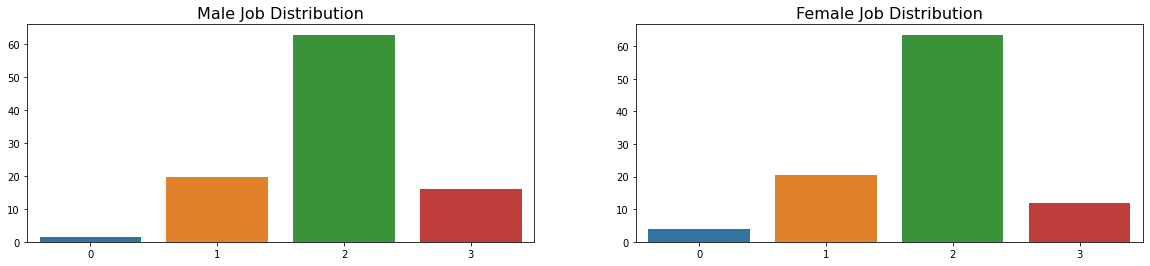

In [55]:
# Percent distribution of Gender with Job

male_purpose = number_of_jobs['male'].values.tolist()
female_purpose = number_of_jobs['female'].values.tolist()
job = temp['Job'].unique().tolist()
job.sort()
fig, ax = plt.subplots(1, 2, figsize=(20,4))

sns.barplot(x = job, y = male_purpose, data = temp, ax= ax[0])
ax[0].set_title("Male Job Distribution", fontsize=16)
   
sns.barplot(x = job, y = female_purpose, data = temp, ax= ax[1])
ax[1].set_title("Female Job Distribution", fontsize=16)


plt.show()

- Job :  0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled
- Most of the people are in skilled (2)

In [56]:
# Create a columns Age_Group based on the Age

temp['Age_Group'] = np.nan

temp.loc[temp['Age'] < 18, 'Age_Group'] = 'Child' 
temp.loc[(temp['Age'] >= 18) & (temp['Age'] <= 29), 'Age_Group'] = 'Young'
temp.loc[(temp['Age'] > 29) & (temp['Age'] <= 40), 'Age_Group'] = 'Young_Adults'
temp.loc[(temp['Age'] > 40) & (temp['Age'] <= 55), 'Age_Group'] = 'Senior'
temp.loc[temp['Age'] > 55, 'Age_Group'] = 'Elder' 
    
temp.head()

,Age,Sex,Job,Housing,Saving_Account,Checking_Account,Credit_Amount,Duration,Purpose,Risk,Age_Group
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,NaN,2096,12,education,good,Senior
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,little,4870,24,car,bad,Senior


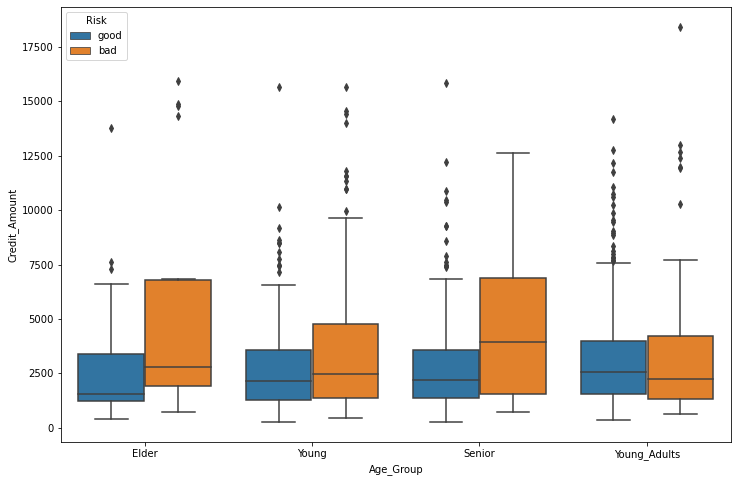

In [57]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'Age_Group', y = 'Credit_Amount', data = temp,hue='Risk')
plt.show()

In [58]:
# Changing the Risk into 0 and 1 

temp['Risk_int'] = np.nan
temp.loc[temp['Risk'] == 'bad', 'Risk_int'] = 0 
temp.loc[temp['Risk'] == 'good', 'Risk_int'] = 1    
temp['Risk_int'] = temp['Risk_int'].astype(int)
temp.head()

,Age,Sex,Job,Housing,Saving_Account,Checking_Account,Credit_Amount,Duration,Purpose,Risk,Age_Group,Risk_int
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,Elder,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,Young,0
2,49,male,1,own,little,NaN,2096,12,education,good,Senior,1
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,Senior,1
4,53,male,2,free,little,little,4870,24,car,bad,Senior,0


In [59]:
temp['Purpose'].unique()

cross_purpose = pd.crosstab(temp['Purpose'], temp['Risk']).apply(lambda x: round(x/x.sum() * 100,2))
cross_purpose.sort_values(by=['bad'])

Risk,bad,good
Purpose,,
domestic appliances,1.33,1.14
vacation/others,1.67,1.00
repairs,2.67,2.00
education,7.67,5.14
business,11.33,9.00
furniture/equipment,19.33,17.57
radio/TV,20.67,31.14
car,35.33,33.00


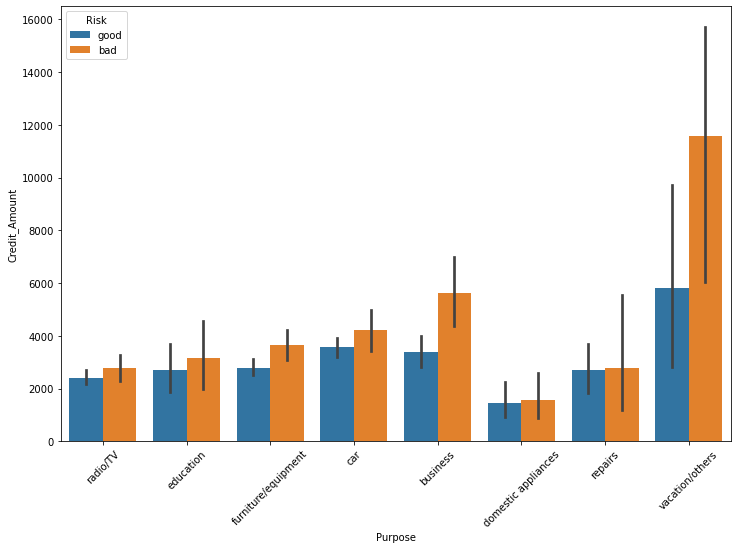

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'Purpose', 
            y = 'Credit_Amount', 
            data = temp, hue='Risk')
plt.xticks(rotation=45)

plt.show()

- vacation/others has the highest risk in bad after that business

### Helper Function

In [61]:
def binary_encode(data, col):
    data = data.copy()
    for column, positive in col:
        data[column] = data[column].apply(lambda x: 1 if x== positive else 0)
    return data

def ordinal_encode(data, ordinal):
    data= data.copy()
    for column, ordering in ordinal:
        data[column] = data[column].apply(lambda x : ordering.index(x))
    return data

def onehot_encode(data, prefix_col):
    data= data.copy()
    for column, prefix in prefix_col:
        dummies = pd.get_dummies(data[column], prefix=prefix,drop_first=True)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data

In [64]:
def preprocess_data(data):
    data = data.copy()
    
    # Deleting column 'Unnamed: 0' 
    data.drop(columns='Unnamed: 0',axis=1, inplace =True)
    
    # Renaming columns
    data = data.rename(columns={
        'Credit amount' : 'Credit_Amount', 
        'Saving accounts':'Saving_Account', 
        'Checking account':'Checking_Account'})
    
    # Creating Age column to categorical 
    interval = (18, 25, 35, 60, 120)

    cats = ['Young', 'Young_Adults', 'Senior','Elder']
    data["Age_Group"] = pd.cut(data['Age'], interval, labels=cats)
    data.drop(['Age'], axis=1, inplace=True)
    
    # Encode missing values with mode
    for col in ['Saving_Account', 'Checking_Account']:
        data[col] = data[col].fillna("No_Account")
        
    # Binary encode the Sex and Risk columns
    data = binary_encode(
        data, 
        col=[
            ('Sex','male'),
            ('Risk','bad')
        ]
    )
    
    # Ordinal encoding the Saving_Account and Checking_Account 
    data = ordinal_encode(
        data, 
        ordinal=[
            ('Saving_Account',['No_Account','little', 'moderate', 'rich', 'quite rich']),
            ('Checking_Account',['No_Account','little', 'moderate', 'rich'])
        ]
    )
    
    # One Hot encoding the Housing and Purpose
    data = onehot_encode(
        data, 
        prefix_col=[
            ('Housing','H'),
            ('Purpose','P'),
            ('Age_Group','A')
        ]
    )
    
    return data
    

### Applying preprocess_data function to data 

In [76]:
df = preprocess_data(data)

In [77]:
df.head()

,Sex,Job,Saving_Account,Checking_Account,Credit_Amount,Duration,Risk,H_own,H_rent,P_car,P_domestic appliances,P_education,P_furniture/equipment,P_radio/TV,P_repairs,P_vacation/others,A_Young_Adults,A_Senior,A_Elder
0,1,2,0,1,1169,6,0,1,0,0,0,0,0,1,0,0,0,0,1
1,0,2,1,2,5951,48,1,1,0,0,0,0,0,1,0,0,0,0,0
2,1,1,1,0,2096,12,0,1,0,0,0,1,0,0,0,0,0,1,0
3,1,2,1,1,7882,42,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1,2,1,1,4870,24,1,0,0,1,0,0,0,0,0,0,0,1,0


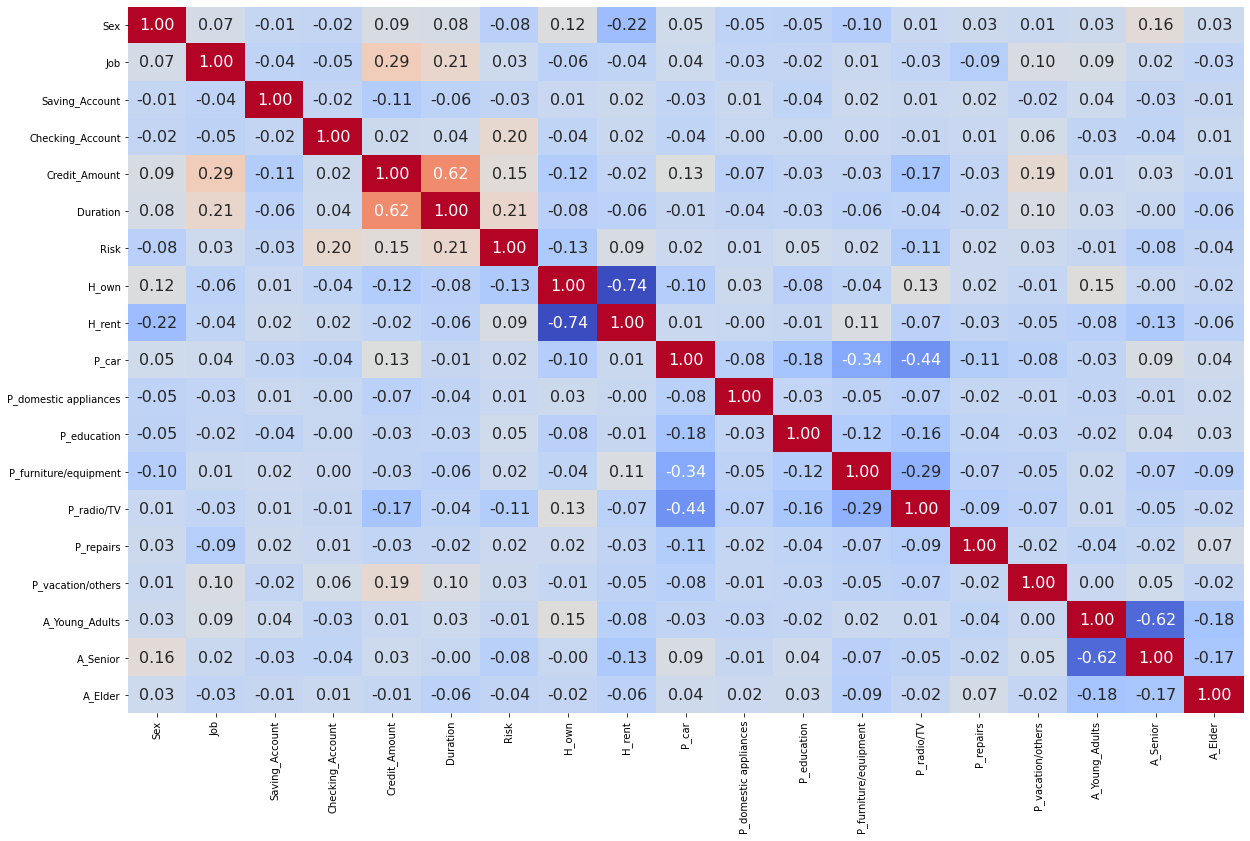

In [78]:
# checking correlation

plt.figure(figsize=(20,13))
sns.heatmap(df.corr(),
            cmap='coolwarm',
            annot=True,
            fmt=".2f",
            annot_kws={'size':16},
            cbar=False)
plt.show()

In [79]:
correlated_features = set()
correlation_matrix = df.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
print(len(correlated_features))

0


- No correlated_features are there.

### Spliting the data

In [96]:
df['Credit_Amount'] = np.log(df['Credit_Amount'])

X = df.drop('Risk', 1)
y = df["Risk"]

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

LR: 0.254567 (0.087530)
KNN: 0.362180 (0.080301)
CART: 0.522512 (0.119471)
NB: 0.380616 (0.087809)
RF: 0.391755 (0.074982)
SVM: 0.178775 (0.073679)
XGB: 0.464258 (0.086872)


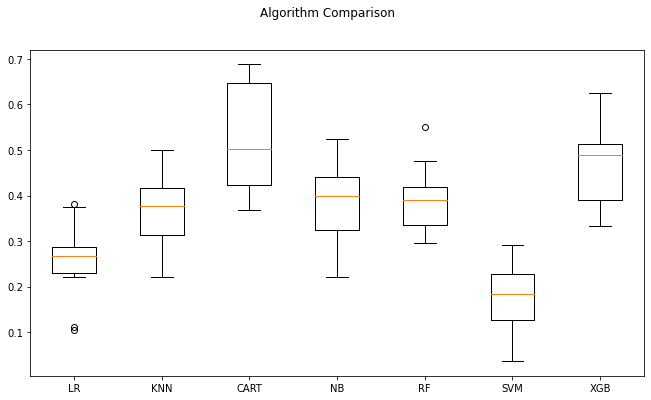

In [84]:
# to feed the random state
#seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier(eval_metric='logloss')))

# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- We can observe that our best results was with CART and XGBoost.
- I will implement some models and try to do a simple Tunning on them

Recall score is used to measure the model performance in terms of measuring the count of true positives in a correct manner out of all the actual positive values.

In [86]:
#Seting the Hyper Parameters

param_test1 = {
 'max_depth':[3,5,6,10],
 'min_child_weight':[3,5,10],
 'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
# 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 10],
 'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}

#Creating the classifier
model_xg = XGBClassifier(eval_metric='logloss', random_state=2)

grid_search = GridSearchCV(model_xg, param_grid=param_test1, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, mono...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=2, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                       

In [87]:
grid_search.best_score_
grid_search.best_params_

{'colsample_bytree': 0.85,
 'gamma': 0.4,
 'max_depth': 3,
 'min_child_weight': 3,
 'subsample': 0.8}

In [89]:
y_pred = grid_search.predict(X_test)
print(accuracy_score(y_test,y_pred))

print(confusion_matrix(y_test, y_pred))

0.732
[[150  28]
 [ 39  33]]


In [97]:
def plot_roc(X, y, estimator,n_splits, lns = 100):
    #creating an instance of KFold
    kfold = StratifiedKFold(n_splits=n_splits,shuffle=False)
    #define estimator
    rf = estimator
    #deifne figuresize
    plt.rcParams['figure.figsize'] = (10,5)
    
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0,1,lns)
    i = 1

    for train,test in kfold.split(X,y):
        #get prediction
        prediction = rf.fit(X.iloc[train],y.iloc[train]).predict_proba(X.iloc[test])
        #get the true pos. rate, false pos. rate and threshold
        fpr, tpr, t = roc_curve(y[test], prediction[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        #get the area under the curve
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plot the tpr and fpr
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i= i+1

    #plot the mean ROC
    plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, color='gold',
    label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

    #setup the labels
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title('ROC PLOT', fontsize=16)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

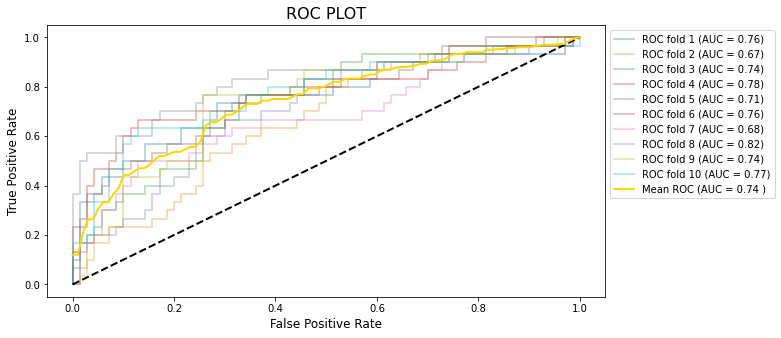

In [103]:
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.set_params(**grid_search.best_params_)

plot_roc(X,y, xgb_model, n_splits=10)